
# Problem 3


*    Explore and cluster the neighborhoods in Toronto.
*    Generate maps to visualize your neighborhoods and how they cluster together





## OLD PART (Problem 1, 2)

### Problem 1

In [11]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

Scrapping

In [12]:
List_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(List_url).text

In [13]:
soup = BeautifulSoup(source, 'xml')
table = soup.find('table')

In [14]:
#dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
column_names = ['Postalcode', 'Borough', 'Neighborhood']
df = pd.DataFrame(columns = column_names)

In [15]:
# Search all the postcode, borough, neighborhood 
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data
df.head(10)

,Postalcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


**Data Cleaning**

remove rows where Borough is 'Not assigned'

In [16]:
df = df[df['Borough']!='Not assigned']
df.head(10)

,Postalcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


### Problem 2

In [17]:
# not used
def get_geocode(postal_code):
    # initialize your variable to None
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude,longitude

In [18]:
geo_df = pd.read_csv('http://cocl.us/Geospatial_data')
geo_df.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [19]:
geo_df.rename(columns={'Postal Code':'Postalcode'},inplace=True)
geo_merged = pd.merge(geo_df, df, on='Postalcode')

geo_data=geo_merged[['Postalcode','Borough','Neighborhood','Latitude','Longitude']]
geo_data.head(10)

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


# **NEW PART (Problem 3)**

In [10]:
import os
import folium
import numpy as np
import matplotlib.cm as cm
from sklearn.cluster import KMeans
import matplotlib.colors as colors
from geopy.geocoders import Nominatim 

In [20]:
toronto_data=geo_data[geo_data['Borough'].str.contains("Toronto")]
toronto_data.head(10)

,Postalcode,Borough,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
45,M4P,Central Toronto,Davisville North,43.712751,-79.390197
46,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
47,M4S,Central Toronto,Davisville,43.704324,-79.388790
48,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
49,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049


In [21]:
CLIENT_ID = 'BUX5N5LKJ2RD4G25IV5MNOTXCXMFZ0UR3MASKIDAXKAWIZ3J' # your Foursquare ID
CLIENT_SECRET = '4N2N0EQXGRQ5ITBE23DD1O1EGSLJPQCXT5IIB5LJ0DU33HGN' # your Foursquare Secret
VERSION = '20210116'

In [22]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West,  Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High

In [24]:
toronto_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop
5,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
6,"The Danforth West, Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
7,"The Danforth West, Riverdale",43.679557,-79.352188,Mezes,43.677962,-79.350196,Greek Restaurant
8,"The Danforth West, Riverdale",43.679557,-79.352188,La Diperie,43.677702,-79.352265,Ice Cream Shop
9,"The Danforth West, Riverdale",43.679557,-79.352188,Dolce Gelato,43.677773,-79.351187,Ice Cream Shop


In [25]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",17,17,17,17,17,17
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",14,14,14,14,14,14
Central Bay Street,61,61,61,61,61,61
Christie,16,16,16,16,16,16
Church and Wellesley,77,77,77,77,77,77
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,33,33,33,33,33,33


In [26]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot.drop(['Neighborhood'],axis=1,inplace=True) 
toronto_onehot.insert(loc=0, column='Neighborhood', value=toronto_venues['Neighborhood'] )
toronto_onehot.shape

(1612, 236)

In [27]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,...,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.017241,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.017241,0.034483,0.0,0.000000,0.0,0.017241,0.017241,0.0,0.034483,0.0,0.0,0.017241,0.000000,0.0,0.0,0.017241,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.034483,0.0,0.017241,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.017241,0.0,0.000000,0.0,0.017241,0.0,0.0,0.0,0.017241,0.0,0.0,0.017241,0.0,0.0,0.0,0.0,0.017241,0.0,0.0,0.0,0.0,0.0,0.0,0.017241,0.0,0.0,0.000000,0.0,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086957,0.0,0.043478,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.086957,0.000000,0.000000,0.0,0.000000,0.043478,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.043478,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.058824,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.058824,0.000000,0.0,0.000000,0.058824,0.0,0.0,...,0.000000,0.0,0.000000,0.058824,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.058824
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.071429,0.071429,0.142857,0.214286,0.142857,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.071429,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
4,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.016393,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.032787,0.0,0.032787,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.016393,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.016393,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.016393,0.0,0.0,0.0,0.0,0.0,0.0,0.016393,0.0,0.0,0.016393,0.0,0.016393


In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Bakery,Restaurant,Beer Bar,Farmers Market,Cheese Shop,Beach,Liquor Store
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Bakery,Pet Store,Stadium,Burrito Place,Restaurant,Climbing Gym,Performing Arts Venue
2,"Business reply mail Processing Centre, South C...",Yoga Studio,Garden,Burrito Place,Brewery,Light Rail Station,Spa,Farmers Market,Fast Food Restaurant,Restaurant,Recording Studio
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Airport,Boat or Ferry,Coffee Shop,Rental Car Location,Sculpture Garden,Harbor / Marina,Airport Food Court
4,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Salad Place,Middle Eastern Restaurant,Bubble Tea Shop,Burger Joint,Indian Restaurant,Ice Cream Shop
5,Christie,Grocery Store,Café,Park,Coffee Shop,Italian Restaurant,Candy Store,Restaurant,Athletics & Sports,Baby Store,Nightclub
6,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Fast Food Restaurant,Restaurant,Gay Bar,Pub,Men's Store,Mediterranean Restaurant,Hotel
7,"Commerce Court, Victoria Hotel",Coffee Shop,Restaurant,Café,Hotel,American Restaurant,Gym,Deli / Bodega,Seafood Restaurant,Italian Restaurant,Japanese Restaurant
8,Davisville,Pizza Place,Dessert Shop,Sandwich Place,Italian Restaurant,Gym,Sushi Restaurant,Café,Coffee Shop,Gourmet Shop,Indian Restaurant
9,Davisville North,Hotel,Gym / Fitness Center,Park,Sandwich Place,Breakfast Spot,Department Store,Food & Drink Shop,Yoga Studio,Doner Restaurant,Donut Shop


In [30]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [31]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head(10)

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Pub,Health Food Store,Trail,Yoga Studio,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Electronics Store
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Italian Restaurant,Coffee Shop,Furniture / Home Store,Ice Cream Shop,Fruit & Vegetable Store,Pub,Bookstore,Indian Restaurant,Cosmetics Shop
42,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0,Sandwich Place,Park,Fast Food Restaurant,Ice Cream Shop,Pub,Liquor Store,Brewery,Fish & Chips Shop,Italian Restaurant,Restaurant
43,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Coffee Shop,Brewery,Gastropub,Café,American Restaurant,Bakery,Yoga Studio,Comfort Food Restaurant,Seafood Restaurant,Cheese Shop
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0,Park,Bus Line,Business Service,Swim School,Yoga Studio,Distribution Center,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store
45,M4P,Central Toronto,Davisville North,43.712751,-79.390197,0,Hotel,Gym / Fitness Center,Park,Sandwich Place,Breakfast Spot,Department Store,Food & Drink Shop,Yoga Studio,Doner Restaurant,Donut Shop
46,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678,0,Sporting Goods Shop,Coffee Shop,Clothing Store,Yoga Studio,Chinese Restaurant,Seafood Restaurant,Spa,Fast Food Restaurant,Salon / Barbershop,Café
47,M4S,Central Toronto,Davisville,43.704324,-79.388790,0,Pizza Place,Dessert Shop,Sandwich Place,Italian Restaurant,Gym,Sushi Restaurant,Café,Coffee Shop,Gourmet Shop,Indian Restaurant
48,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,1,Lawyer,Tennis Court,Restaurant,Yoga Studio,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store
49,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,0,Coffee Shop,Bagel Shop,Liquor Store,Restaurant,Supermarket,Bank,Sushi Restaurant,Fried Chicken Joint,Pub,Light Rail Station


In [32]:
neighborhoods_venues_sorted.head(10)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Bakery,Restaurant,Beer Bar,Farmers Market,Cheese Shop,Beach,Liquor Store
1,0,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Bakery,Pet Store,Stadium,Burrito Place,Restaurant,Climbing Gym,Performing Arts Venue
2,0,"Business reply mail Processing Centre, South C...",Yoga Studio,Garden,Burrito Place,Brewery,Light Rail Station,Spa,Farmers Market,Fast Food Restaurant,Restaurant,Recording Studio
3,0,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Airport,Boat or Ferry,Coffee Shop,Rental Car Location,Sculpture Garden,Harbor / Marina,Airport Food Court
4,0,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Salad Place,Middle Eastern Restaurant,Bubble Tea Shop,Burger Joint,Indian Restaurant,Ice Cream Shop
5,0,Christie,Grocery Store,Café,Park,Coffee Shop,Italian Restaurant,Candy Store,Restaurant,Athletics & Sports,Baby Store,Nightclub
6,0,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Fast Food Restaurant,Restaurant,Gay Bar,Pub,Men's Store,Mediterranean Restaurant,Hotel
7,0,"Commerce Court, Victoria Hotel",Coffee Shop,Restaurant,Café,Hotel,American Restaurant,Gym,Deli / Bodega,Seafood Restaurant,Italian Restaurant,Japanese Restaurant
8,0,Davisville,Pizza Place,Dessert Shop,Sandwich Place,Italian Restaurant,Gym,Sushi Restaurant,Café,Coffee Shop,Gourmet Shop,Indian Restaurant
9,0,Davisville North,Hotel,Gym / Fitness Center,Park,Sandwich Place,Breakfast Spot,Department Store,Food & Drink Shop,Yoga Studio,Doner Restaurant,Donut Shop


In [33]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 43.6534817, -79.3839347.


In [34]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

IN CASE THE MAP IS HIDEN..

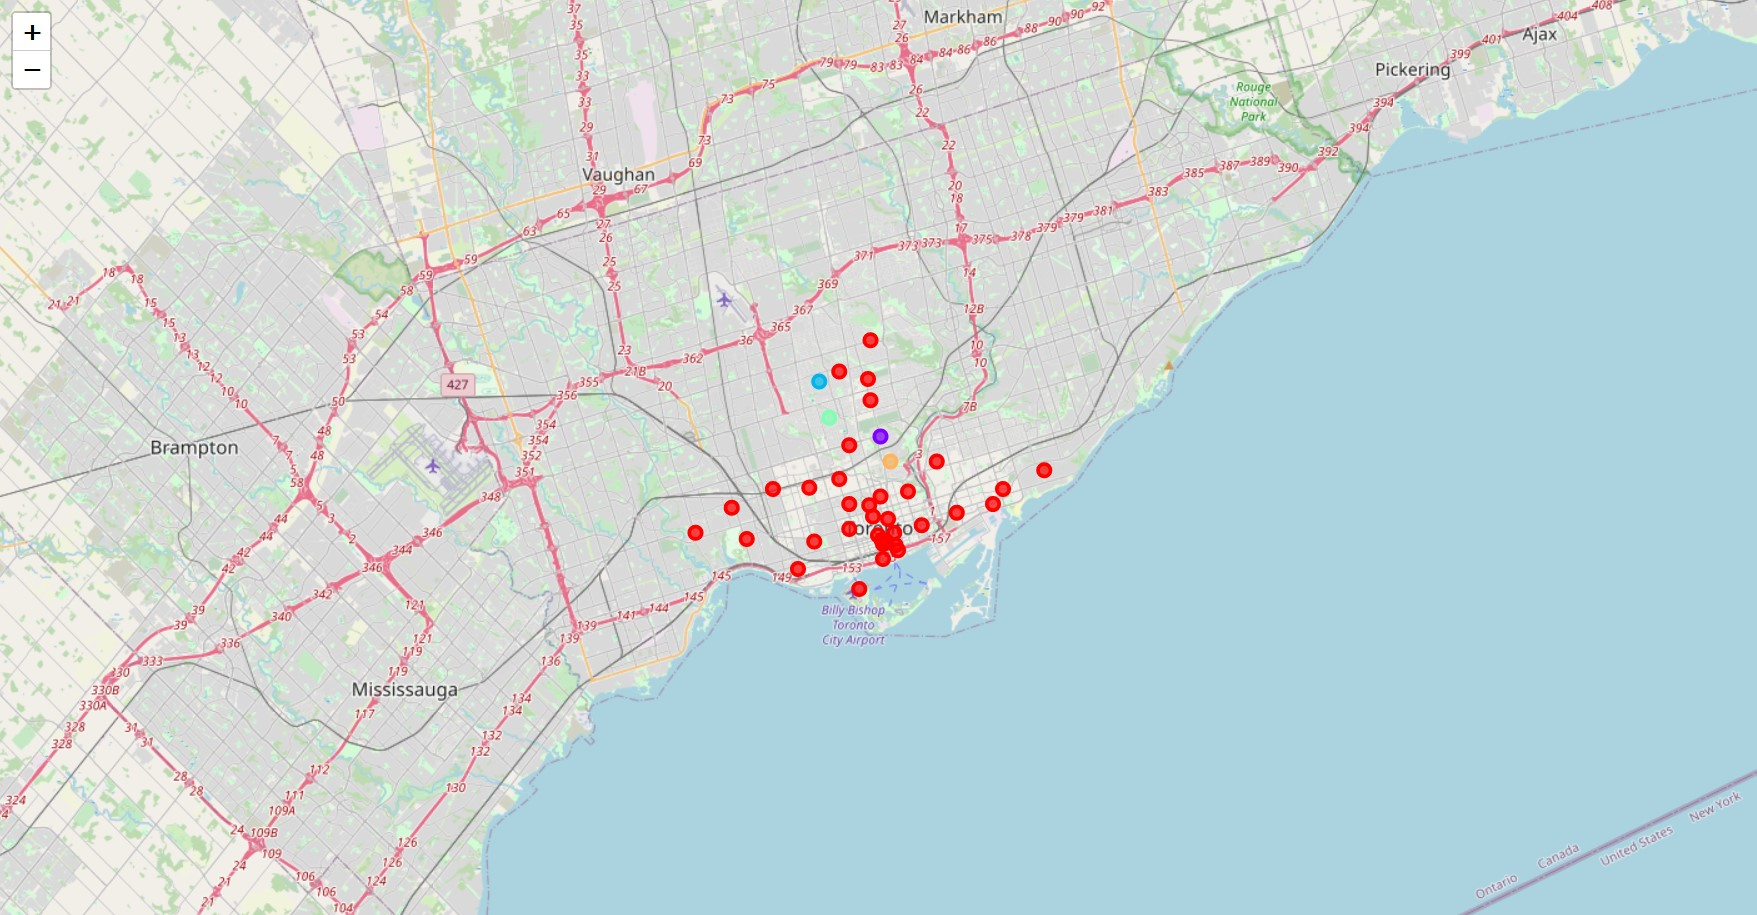